<a href="https://colab.research.google.com/github/KOWilliams/KOWilliams/blob/main/Plant_Disease_Classification_Merged_Dataset_images_(Rice_Extracted).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This dataset is located at https://www.kaggle.com/datasets/alinedobrovsky/plant-disease-classification-merged-dataset

In [ ]:
!pip install kaggle
# The command pip install kaggle
# is used to install the Kaggle Python package using the pip package manager

In [ ]:
from google.colab import files
files.upload()
# This line of code is used to upload files from
# the local machine to the Colab environment.

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kehindeoluwaseun","key":"34b8688e556df9e46dd1bf0ae96b6056"}'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# The set of code above are used to set up the Kaggle API key on my computer.
# The purpose of these commands is to create a directory named .kaggle
# in the home directory, we move the Kaggle API key file (kaggle.json) into
# that directory, and set the appropriate permissions to ensure that only
# the owner has read and write access to the API key file.
# This is done for security reasons to protect your Kaggle API credentials
# from unauthorized access. The Kaggle API key is used to authenticate and
# interact with the Kaggle platform programmatically.

In [ ]:
!kaggle datasets download -d alinedobrovsky/plant-disease-classification-merged-dataset

100% 17.3G/17.3G [12:35<00:00, 27.7MB/s]
100% 17.3G/17.3G [12:35<00:00, 24.6MB/s]


In [ ]:
!unzip plant-disease-classification-merged-dataset -d plant-disease-classification-merged-dataset

Streaming output truncated to the last 5000 lines.
  inflating: plant-disease-classification-merged-dataset/Tomato__yellow_leaf_curl_virus/4adc4360-b4da-4955-adb4-6f7d52f1c890___UF.GRC_YLCV_Lab 02752.JPG  
  inflating: plant-disease-classification-merged-dataset/Tomato__yellow_leaf_curl_virus/4adc46cc-60dd-48a7-8d4c-f6394577a14a___UF.GRC_YLCV_Lab 01543.JPG  
  inflating: plant-disease-classification-merged-dataset/Tomato__yellow_leaf_curl_virus/4ae10eb4-cd1f-490e-9ffe-61e348dad2b9___YLCV_GCREC 2785.JPG  
  inflating: plant-disease-classification-merged-dataset/Tomato__yellow_leaf_curl_virus/4ae45072-4db3-477d-9ace-9a08ce483d46___UF.GRC_YLCV_Lab 01407.JPG  
  inflating: plant-disease-classification-merged-dataset/Tomato__yellow_leaf_curl_virus/4ae66de5-2a7a-41bf-b0c3-7c00d2ce3b21___UF.GRC_YLCV_Lab 02136.JPG  
  inflating: plant-disease-classification-merged-dataset/Tomato__yellow_leaf_curl_virus/4af9c16d-2976-48f1-bb9a-bf7a3137488a___UF.GRC_YLCV_Lab 03352.JPG  
  inflating: plant-diseas

In [ ]:
import pandas as pd
import numpy as np
from glob import glob
import cv2
import os
# the code imports essential libraries for data analysis (pandas, numpy),
# file and directory manipulation (glob, os), and image processing (cv2).
# These libraries are commonly used in tasks related to data science,
# machine learning, and computer vision.
# Definition of the paths to the plant-disease-classification-merged-dataset image folders (BrownSpot, Healthy, Hispa, LeafBlast and NeckBlast)
Rice_brown_spot_folder = '/content/plant-disease-classification-merged-dataset/Rice__brown_spot'
Rice_healthy_folder = '/content/plant-disease-classification-merged-dataset/Rice__healthy'
Rice_hispa_folder = '/content/plant-disease-classification-merged-dataset/Rice__hispa'
Rice_leaf_blast_folder = '/content/plant-disease-classification-merged-dataset/Rice__leaf_blast'
Rice_neck_blast_folder = '/content/plant-disease-classification-merged-dataset/Rice__neck_blast'
# We are initializing the lists to store images and labels
images = []
labels = []
# We Load and pre-process Plant Disease Classification Merged Dataset images (Rice Brown Spot)
for filename in os.listdir(Rice_brown_spot_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(Rice_brown_spot_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(0)  # 0 represents Rice Brown Spot
# We Load and pre-process Plant Disease Classification Merged Dataset images (Rice Healthy)
for filename in os.listdir(Rice_healthy_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(Rice_healthy_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(1)  # 1 represents Rice Healthy
# We Load and pre-process Plant Disease Classification Merged Dataset images (Rice Hispa)
for filename in os.listdir(Rice_hispa_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(Rice_hispa_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(2)  # 2 represents Rice Hispa
# We Load and pre-process Plant Disease Classification Merged Dataset images (Rice Leaf Blast)
for filename in os.listdir(Rice_leaf_blast_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(Rice_leaf_blast_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(3)  # 3 represents Rice Leaf Blast
# We Load and pre-process Plant Disease Classification Merged Dataset images (Rice Neck Blast)
for filename in os.listdir(Rice_neck_blast_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(Rice_neck_blast_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(4)  # 4 represents Rice Neck Blast
# We Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split

# We are Spliting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Assuming we have already loaded and pre-processed data
# (x_train, y_train, x_test, y_test)

# Definition of the model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')  # 5 classes: BrownSpot, Healthy, Hispa, LeafBlast and NeckBlast
])

# Compilation of the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training of the model
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/30
117/117 [==============================] - 102s 865ms/step - loss: 71.3663 - accuracy: 0.4400 - val_loss: 1.3789 - val_accuracy: 0.5503
Epoch 2/30
117/117 [==============================] - 101s 862ms/step - loss: 0.9643 - accuracy: 0.6063 - val_loss: 1.1820 - val_accuracy: 0.5032
Epoch 3/30
117/117 [==============================] - 106s 906ms/step - loss: 0.8035 - accuracy: 0.6674 - val_loss: 1.0791 - val_accuracy: 0.5803
Epoch 4/30
117/117 [==============================] - 101s 858ms/step - loss: 0.6239 - accuracy: 0.7525 - val_loss: 1.0797 - val_accuracy: 0.5867
Epoch 5/30
117/117 [==============================] - 100s 855ms/step - loss: 0.4786 - accuracy: 0.8187 - val_loss: 1.2070 - val_accuracy: 0.6146
Epoch 6/30
117/117 [==============================] - 94s 803ms/step - loss: 0.4038 - accuracy: 0.8554 - val_loss: 1.3390 - val_accuracy: 0.5953
Epoch 7/30
117/117 [==============================] - 96s 820ms/step - loss: 0.3047 - accuracy: 0.8929 - val_loss: 1.4802 - 

In [ ]:
# Evaluation of the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# We also make predictions on the test set
predictions = model.predict(x_test)

# We convert the one-hot encoded predictions to class labels
predicted_labels = tf.argmax(predictions, axis=1)

# Now we will compare the predicted labels with the true labels (y_test)
# to analyze performance further

30/30 [==============================] - 8s 260ms/step - loss: 2.9430 - accuracy: 0.6113
Test Loss: 2.9430112838745117
Test Accuracy: 0.6113490462303162
30/30 [==============================] - 6s 189ms/step


In [ ]:
# Predicting on a single image
sample_image = x_test[3]  # Here we replace with our image data
predictions = model.predict(np.expand_dims(sample_image, axis=0))
predicted_label = np.argmax(predictions)

# Here we interpret the label using our dataset's class labels (0 BrownSpot, 1 Healthy, 2 Hispa, 3 LeafBlast, 4 NeckBlast)
class_labels = 'BrownSpot', 'Healthy','Hispa','LeafBlast','NeckBlast'
predicted_class = class_labels[predicted_label]
print(f'Predicted class: {predicted_class}')

1/1 [==============================] - 0s 80ms/step
Predicted class: Hispa


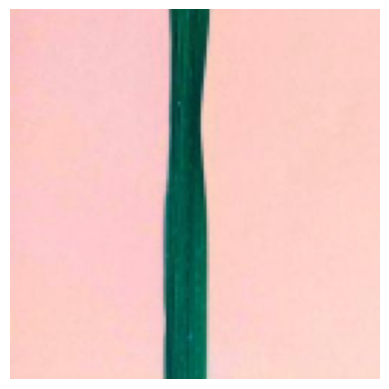

In [ ]:
import matplotlib.pyplot as plt

# Display the sample image
plt.imshow(sample_image)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

In [ ]:
from google.colab import files
files.upload()
# This line of code is used to upload files from
# the local machine to the Colab environment.

In [ ]:
# we test the model with a new photo from the internet.
# we know already that this new image is a Healthy image.
from PIL import Image
import numpy as np

# we test the model with a new photo from the internet.
# we know already that this new image is a Healthy image.
from PIL import Image
import numpy as np

# Load the new image
new_image_path = '/content/plant-disease-classification-merged-dataset/Rice__neck_blast/IMG20201108163458_00.jpg'
# Replace with the actual path to your new image
new_image = Image.open(new_image_path)

# Resize the image to match the input size expected by your model
input_size = (128, 128)  # Adjust this size based on your model's input size
new_image = new_image.resize(input_size)

# Convert the PIL image to a NumPy array
new_image_array = np.array(new_image)

# Normalize the image pixel values (if needed)
new_image_array = new_image_array / 255.0

# Making predictions on the new image
predictions = model.predict(np.expand_dims(new_image_array, axis=0))
predicted_label = np.argmax(predictions)

# Interpret the label using your dataset's class labels
class_labels = ['BrownSpot', 'Healthy','Hispa','LeafBlast','NeckBlast']
predicted_class = class_labels[predicted_label]
print(f'Predicted class: {predicted_class}')

# Close the image
new_image.close()

1/1 [==============================] - 0s 119ms/step
Predicted class: LeafBlast


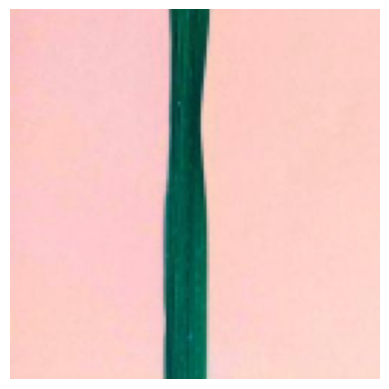

In [ ]:
import matplotlib.pyplot as plt
# Display the sample image
plt.imshow(sample_image)
plt.axis("off")  # Turn off axis labels and ticks
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 64)                3

30/30 [==============================] - 7s 214ms/step


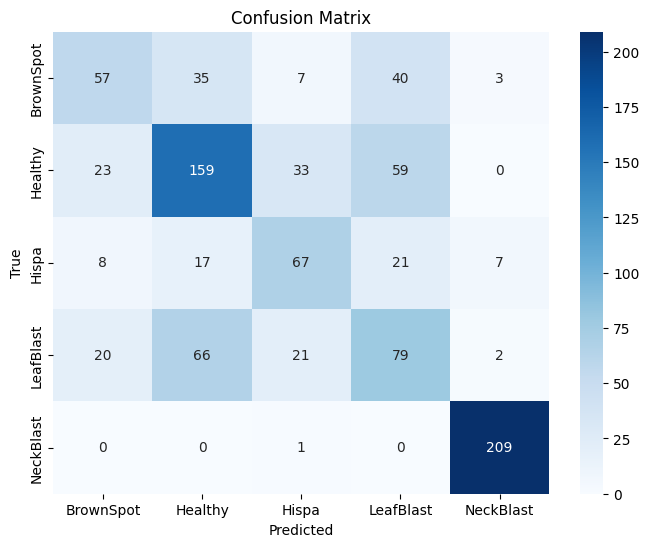

              precision    recall  f1-score   support

   BrownSpot       0.53      0.40      0.46       142
     Healthy       0.57      0.58      0.58       274
       Hispa       0.52      0.56      0.54       120
   LeafBlast       0.40      0.42      0.41       188
   NeckBlast       0.95      1.00      0.97       210

    accuracy                           0.61       934
   macro avg       0.59      0.59      0.59       934
weighted avg       0.61      0.61      0.61       934



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'predicted_labels' are the model's predicted labels for the test set
# 'y_test' contains the true labels of the test set

# Convert one-hot encoded predictions to class labels
predicted_labels = model.predict(x_test)
predicted_labels = tf.argmax(predicted_labels, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['BrownSpot', 'Healthy','Hispa','LeafBlast','NeckBlast'], yticklabels=['BrownSpot', 'Healthy','Hispa','LeafBlast','NeckBlast'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
class_report = classification_report(y_test, predicted_labels, target_names=['BrownSpot', 'Healthy','Hispa','LeafBlast','NeckBlast'])
print(class_report)